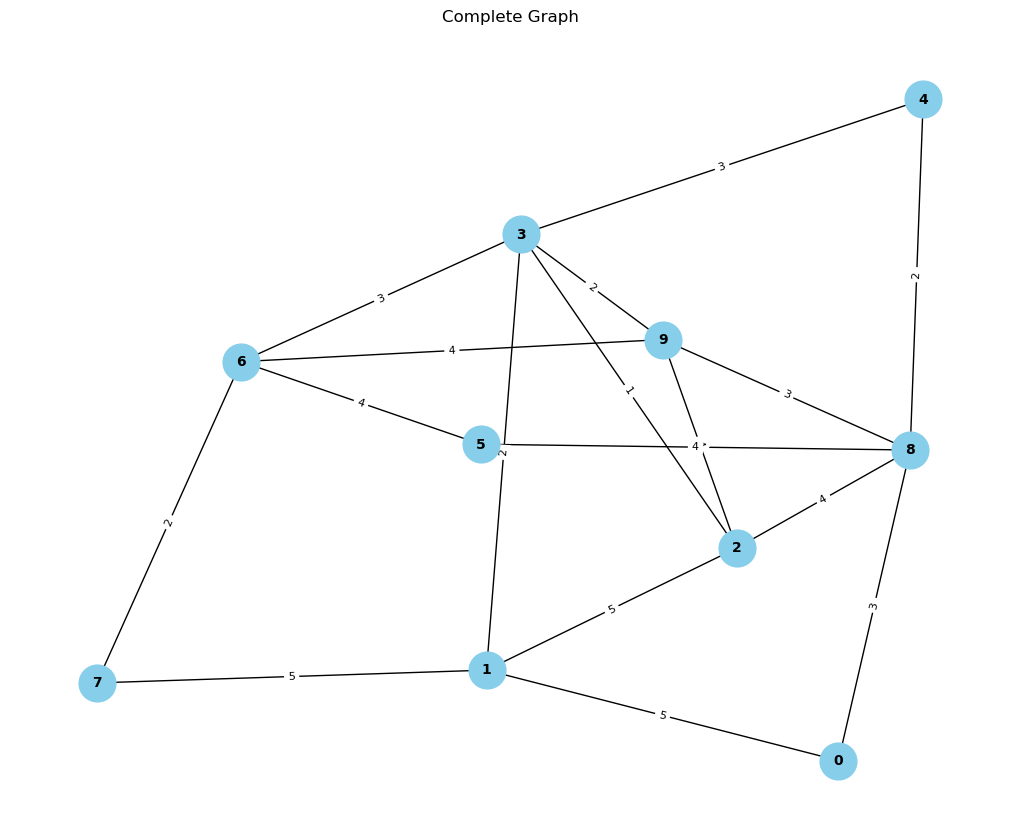

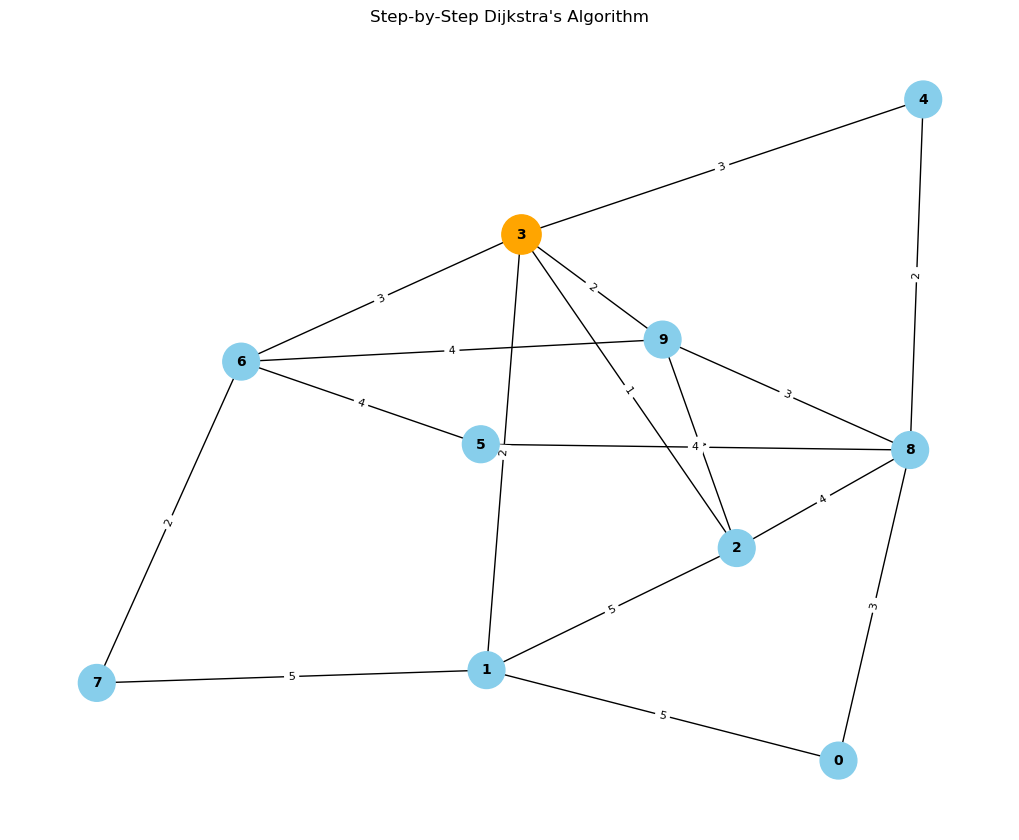

<Figure size 640x480 with 0 Axes>

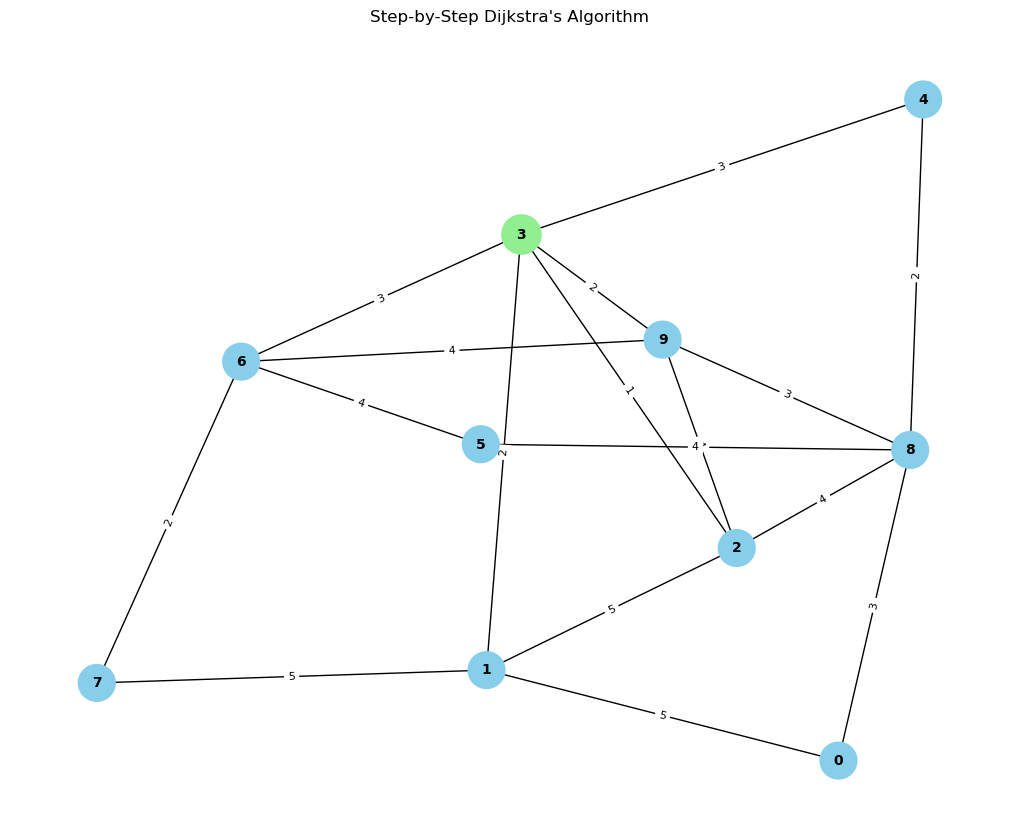

<Figure size 640x480 with 0 Axes>

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from tkinter import Tk, simpledialog, messagebox
import sys

def generate_adjacency_matrix(size, max_weight=5, sparsity=0.5, seed=None):
    """
    Generate a random adjacency matrix.

    Parameters:
    - size: Number of nodes in the graph.
    - max_weight: Maximum weight for the edges.
    - sparsity: Proportion of zero elements (0 for no sparsity, 1 for full sparsity).
    - seed: Seed for reproducibility (optional).

    Returns:
    - adjacency_matrix: A symmetric adjacency matrix.
    """
    if seed is not None:
        np.random.seed(seed)

    # Generate a random matrix of weights
    matrix = np.random.randint(1, max_weight + 1, size=(size, size))

    # Make it symmetric
    matrix = np.triu(matrix) + np.triu(matrix, 1).T

    # Introduce sparsity
    zero_mask = np.random.rand(size, size) < sparsity
    matrix[zero_mask] = 0

    # Ensure diagonal is zero (no self-loops)
    np.fill_diagonal(matrix, 0)

    return matrix


def generate_graph(adjacency_matrix):
    G = nx.Graph()
    for i in range(len(adjacency_matrix)):
        for j in range(len(adjacency_matrix[i])):
            if adjacency_matrix[i][j] != 0:
                G.add_edge(i, j, weight=adjacency_matrix[i][j])
    return G

def visualize_full_graph(G, pos):
    """
    Visualizes the complete graph before starting the step-by-step visualization.
    """
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, font_size=10, font_weight='bold')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
    plt.title("Complete Graph")
    plt.show()

def visualize_step(G, pos, visited_nodes, current_node=None, shortest_path=None):
    """
    Visualizes the graph step by step with nodes and edges updated dynamically.
    """
    plt.figure(figsize=(10, 8))

    # Highlight visited nodes
    node_colors = ['yellow' if node in visited_nodes else 'skyblue' for node in G.nodes]
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=700, font_size=10, font_weight='bold')

    # Highlight the current node being processed
    if current_node is not None:
        nx.draw_networkx_nodes(G, pos, nodelist=[current_node], node_color='orange', node_size=800)

    # Highlight the shortest path
    if shortest_path:
        path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
        nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color='lightgreen', node_size=800)

    # Add edge weights
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Step-by-Step Dijkstra's Algorithm")
    plt.pause(1)  # Pause to visualize the step
    plt.draw()  # Redraw the current figure

def dijkstra_with_steps(G, source, target):
    """
    Implements Dijkstra's algorithm and visualizes each step.
    """
    pos = nx.spring_layout(G)
    visualize_full_graph(G, pos)  # Show the full graph first

    visited_nodes = set()
    distances = {node: float('inf') for node in G.nodes}
    previous_nodes = {node: None for node in G.nodes}

    distances[source] = 0
    unvisited = set(G.nodes)

    while unvisited:
        # Find the unvisited node with the smallest distance
        current_node = min(unvisited, key=lambda node: distances[node])
        if distances[current_node] == float('inf'):
            break  # All remaining nodes are unreachable

        visited_nodes.add(current_node)
        unvisited.remove(current_node)

        # Visualize the current step
        visualize_step(G, pos, visited_nodes, current_node)

        # Check neighbors and update distances
        for neighbor in G.neighbors(current_node):
            if neighbor in unvisited:
                new_distance = distances[current_node] + G[current_node][neighbor]['weight']
                if new_distance < distances[neighbor]:
                    distances[neighbor] = new_distance
                    previous_nodes[neighbor] = current_node

        if current_node == target:
            break

    # Reconstruct the shortest path
    shortest_path = []
    while target is not None:
        shortest_path.insert(0, target)
        target = previous_nodes[target]

    # Final visualization with the shortest path
    visualize_step(G, pos, visited_nodes, shortest_path=shortest_path)
    plt.show()
    return shortest_path

def main():
#     USER INPUT FOR GRAPH
    adjacency_matrix = generate_adjacency_matrix(size=10, max_weight=5, sparsity=0.7, seed=42)
# ----------------------------------------------
    G = generate_graph(adjacency_matrix)

    # User input dialog box
    root = Tk()
    root.withdraw()  # Hide the root window
    source = simpledialog.askinteger("Input", "Enter the source node (0-9):", minvalue=0, maxvalue=9)
    target = simpledialog.askinteger("Input", "Enter the destination node (0-9):", minvalue=0, maxvalue=9)

    if source is None or target is None:
        messagebox.showinfo("Cancelled", "Operation cancelled by the user.")
        return

    try:
        shortest_path = dijkstra_with_steps(G, source, target)
        if shortest_path:
            messagebox.showinfo("Shortest Path", f"The shortest path is: {shortest_path}")
        else:
            messagebox.showwarning("No Path", f"No path exists between node {source} and node {target}.")
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")
    finally:
        root.quit()  # Close the tkinter window after execution

if __name__ == "__main__":
    main()


In [29]:
class Dijkstra:
    V = 10  # Number of vertices in the graph

    def __init__(self):
        self.output_dist = []
        self.destination_location = None

    def min_distance(self, dist, spt_set):
        # Find the vertex with the minimum distance value
        min_val = sys.maxsize
        min_index = -1

        for v in range(self.V):
            if not spt_set[v] and dist[v] <= min_val:
                min_val = dist[v]
                min_index = v

        return min_index

    @staticmethod
    def get_min_distance(dist, destination):
        return dist[destination]

    def print_solution(self, dist, src):
        print(f"Vertex \t\t Distance from Source Node {src}")
        for i in range(self.V):
            print(f"{i} \t\t {dist[i]}")

    def dijkstra(self, graph, src):
        # Initialize distance and spt_set arrays
        dist = [sys.maxsize] * self.V
        spt_set = [False] * self.V

        dist[src] = 0  # Distance to source is 0

        for _ in range(self.V - 1):
            # Pick the minimum distance vertex
            u = self.min_distance(dist, spt_set)

            spt_set[u] = True

            # Update distance of adjacent vertices
            for v in range(self.V):
                if (
                    not spt_set[v]
                    and graph[u][v] != 0
                    and dist[u] != sys.maxsize
                    and dist[u] + graph[u][v] < dist[v]
                ):
                    dist[v] = dist[u] + graph[u][v]

        return dist

    def feed_dijkstra(self):
#         graph = [
#             [0, 3, 0, 0, 1, 0, 0, 0, 0, 0],
#             [3, 0, 1, 0, 0, 0, 0, 2, 0, 0],
#             [0, 1, 0, 2, 0, 0, 0, 5, 2, 0],
#             [0, 0, 2, 0, 2, 0, 1, 0, 0, 3],
#             [1, 0, 0, 2, 0, 2, 0, 0, 0, 0],
#             [0, 0, 0, 0, 2, 0, 5, 0, 0, 0],
#             [0, 0, 0, 1, 0, 5, 0, 0, 0, 0],
#             [0, 2, 5, 0, 0, 0, 0, 0, 3, 0],
#             [0, 0, 2, 0, 0, 0, 0, 3, 0, 1],
#             [0, 0, 0, 3, 0, 0, 0, 0, 1, 0],
#         ]
    
        graph = matrix
        print(graph)

        # Take user input for the source node
        src = int(input("Enter the source node (0-9): "))
        if src < 0 or src >= self.V:
            print("Invalid source node. Please enter a number between 0 and 9.")
            return

        self.output_dist = self.dijkstra(graph, src)
        self.print_solution(self.output_dist, src)

    def set_dest_location(self, user_destination_location):
        self.destination_location = user_destination_location
        final_dist = self.get_min_distance(self.output_dist, self.destination_location)
        return final_dist


In [ ]:
dj = Dijkstra()
dj.feed_dijkstra()

# Optionally, take user input for destination node
dest = int(input("Enter the destination node (0-9): "))
if dest < 0 or dest >= dj.V:
    print("Invalid destination node. Please enter a number between 0 and 9.")
else:
    distance_to_destination = dj.set_dest_location(dest)
    print(f"Minimum distance to node {dest}: {distance_to_destination}")

[[0 0 8 5 0 9 5 8 1 0]
 [9 0 2 7 0 2 0 7 4 8]
 [0 0 0 0 0 6 4 5 8 3]
 [4 0 4 0 5 3 3 1 1 2]
 [4 3 0 6 0 8 2 1 9 1]
 [1 7 3 9 6 0 1 7 0 4]
 [5 4 9 7 8 2 0 1 8 4]
 [3 5 9 6 6 9 1 0 7 2]
 [6 3 9 3 8 4 3 1 0 1]
 [2 7 5 0 9 1 4 5 3 0]]


In [21]:
import numpy as np

# Create a 10x10 matrix with random values or specific values
def get_random_array():
    size = 10
    matrix = np.random.randint(0, 10, (size, size))
    np.fill_diagonal(matrix,0)
    # Make the matrix symmetric by setting the upper triangle equal to the lower triangle
    symmetric_matrix = np.triu(matrix) + np.triu(matrix, 1).T
    
    return symmetric_matrix

print(get_random_array())


[[0 4 7 5 8 5 9 0 4 0]
 [4 0 9 5 9 9 5 1 3 1]
 [7 9 0 1 0 2 4 1 6 2]
 [5 5 1 0 2 8 9 0 8 9]
 [8 9 0 2 0 7 9 7 8 9]
 [5 9 2 8 7 0 2 3 7 2]
 [9 5 4 9 9 2 0 8 2 7]
 [0 1 1 0 7 3 8 0 3 0]
 [4 3 6 8 8 7 2 3 0 0]
 [0 1 2 9 9 2 7 0 0 0]]
